## Project 1:  Team : Banu Boopalan  , Umais Siddiqui

## Video Link : 

Goal for this project is to extract through API informatin and then load a network dataset with categorical information.  #2 For each nodes in the dataset, calculate degree centrality and then eigenvector centralility.
#Compare measures across the categories using statistical tests.

## We first extract based on wiki-page titles below on 5 topics , the internal url links and add them to a dataset. 

In [2]:
%%capture
#!pip install wikipedia-api networkx matplotlib pandas;
import wikipediaapi;
import pandas as pd;
import networkx as nx;
import matplotlib.pyplot as plt;
import concurrent.futures;
import warnings;
from IPython.display import display;
from collections import Counter;
import seaborn as sns;


# Suppress warnings
warnings.simplefilter("ignore")
# List of Wikipedia pages to analyze
page_titles = ["Machine learning", "Artificial intelligence", "Data science", "Deep learning", "Neural network"]

# Initialize Wikipedia API
wiki_wiki = wikipediaapi.Wikipedia(user_agent="DataScienceProject/1.0 (umais20@yahoo.com)", language='en')
# Dictionaries to count occurrences
category_counts = Counter()
link_counts = Counter()

# Extract data from each page
data = []
for title in page_titles:
    page = wiki_wiki.page(title)
    page_content = page.text

    # Extract categories (removing "Category:" prefix)
    categories = [cat.replace("Category:", "") for cat in page.categories.keys()]
    category_counts.update(categories)

    # Extract internal Wikipedia links
    links = list(page.links.keys())
    
    #Here is an example of how you can implement these steps:
    
    
    link_counts.update(links)

    # Store in DataFrame format
    data.append({
        "Title": title,
        "Categories": ", ".join(categories),
        #"Category Count": len(categories),
        #"Links Count": len(links),
        "links": ", ".join(links),
        "Page Text": page_content
    })

# Create a DataFrame for articles
df = pd.DataFrame(data)




## The Goal was to create information and a category column based on the link values that are part of the links listed in the wiki  pages related to topics like ["Machine learning", "Artificial intelligence", "Data science", "Deep learning", "Neural network"]

In [3]:
df_transposed = df.melt(id_vars=['Title'], value_vars=['Categories', 'links'], var_name='Type', value_name='Value')
df_transposed['Value'] = df_transposed['Value'].str.split(',')
df_final = df_transposed.explode('Value')

# Strip any leading or trailing whitespace from the values
df_final['Value'] = df_final['Value'].str.strip()


In [94]:
df_final.head()

,Title,Type,Value
0,Machine learning,Categories,Articles with excerpts
0,Machine learning,Categories,Articles with short description
0,Machine learning,Categories,Commons category link from Wikidata
0,Machine learning,Categories,Cybernetics
0,Machine learning,Categories,Definition


In [4]:

df_links_only = df_final[df_final['Type'] == 'links']

df_cat_only = df_final[df_final['Type'] == 'Categories']



In [97]:
df_links_only.head()

,Title,Type,Value
5,Machine learning,links,15.ai
5,Machine learning,links,AAAI Conference on Artificial Intelligence
5,Machine learning,links,ACM Computing Classification System
5,Machine learning,links,ACM Computing Surveys
5,Machine learning,links,ADALINE


In [5]:
# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for _, row in df_links_only.iterrows():
    title = row['Title']
    value = row['Value']
    G.add_node(title, type='Title')
    G.add_edge(title, value)

'''

'''

'\n\n'

## Displaying the graph that was built with the node as a Title of a page and the edges were all the internal URL links associated with that title page. However, this did not get us enough information to do some good analysis.

In [6]:
top_50_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:50]
top_50_nodes = [node for node, degree in top_50_nodes]
subgraph = G.subgraph(top_50_nodes) 

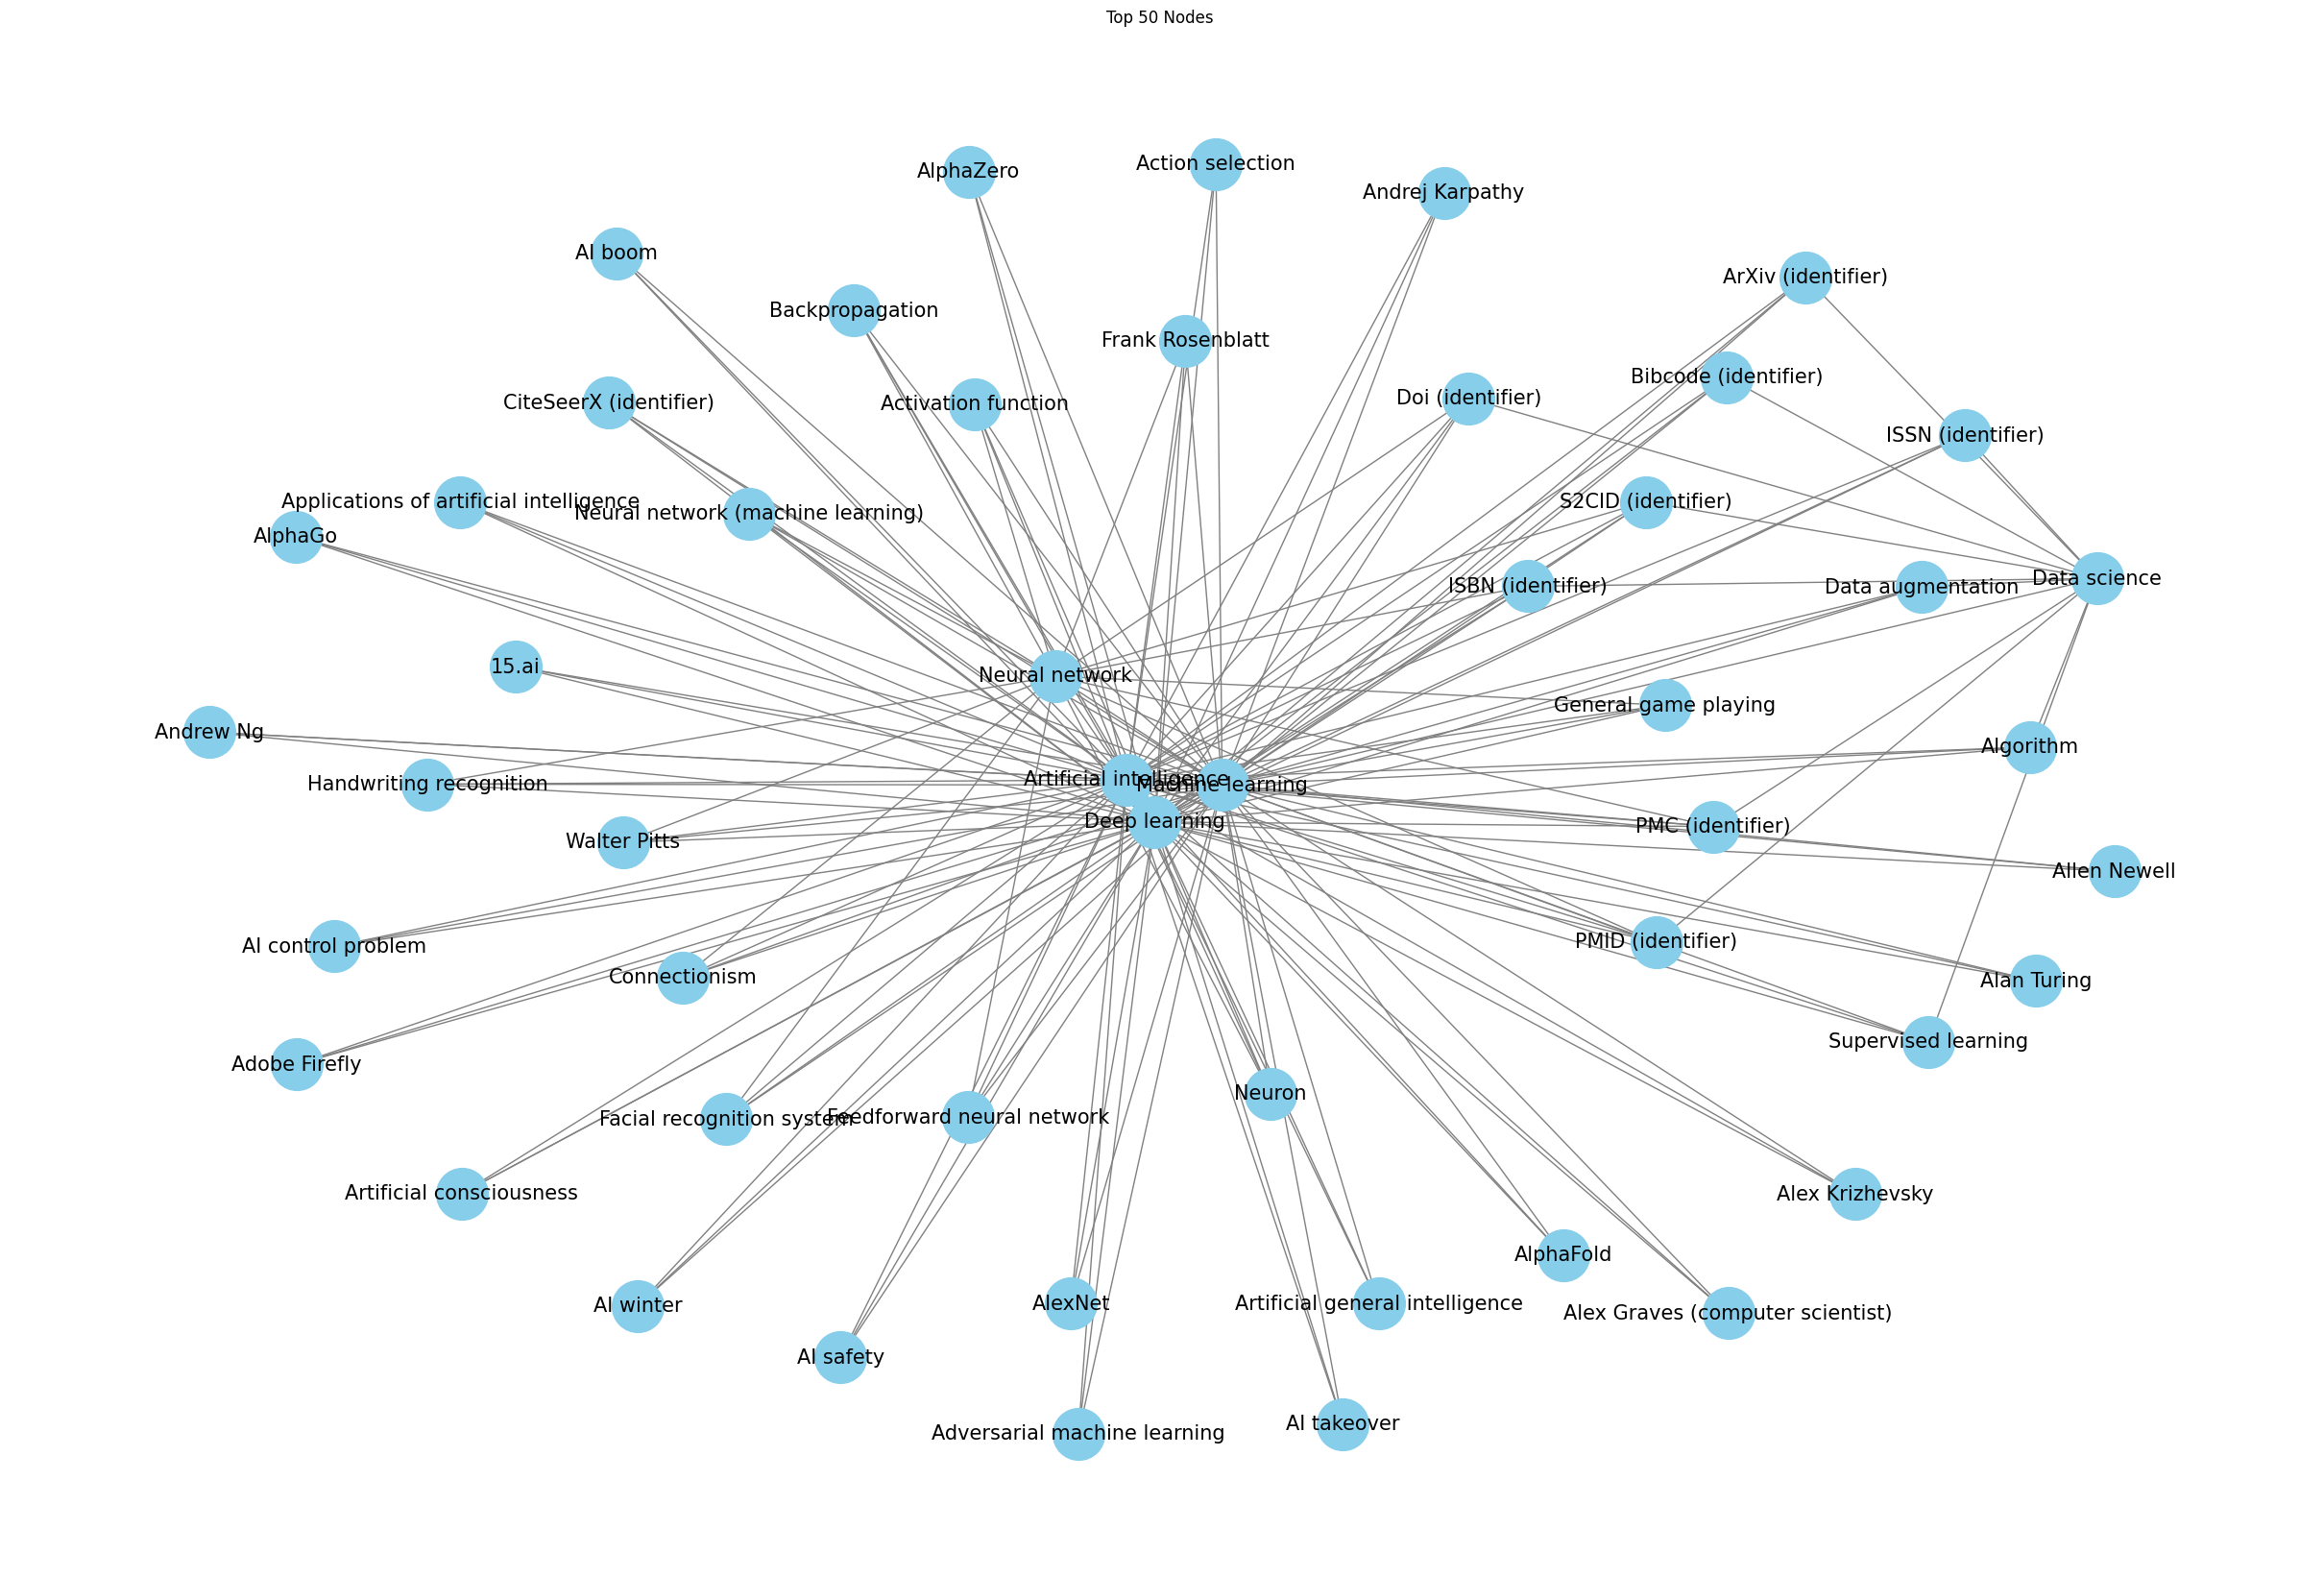

In [7]:
#Create a subgraph
subgraph = G.subgraph(top_50_nodes) 
plt.figure(figsize=(24, 16))
pos = nx.spring_layout(subgraph, k=0.1)  
nx.draw(subgraph, pos, node_size=1500, node_color='skyblue', edge_color='gray', with_labels=True, font_size=15, arrowsize=15)
plt.title("Top 50 Nodes ")
plt.show()

In [21]:
#!pip install spacy
#!python -m spacy download en_core_web_sm

In [22]:
#!pip install nltk

## The method we decided was to tokenize the links column to categorize the values in categories such as Person, Organization and Concept.  Download nltk.

Here's the total links that were extracted and categorized under each Title page category.

Artificial intelligence    1796
Machine learning            905
Deep learning               569
Data science                158
Neural network               58


In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from urllib.parse import urlparse
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.tree import Tree
'''
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('maxent_ne_chunker')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
'''


"\n# Download necessary NLTK data\nnltk.download('punkt')\nnltk.download('punkt_tab')\nnltk.download('maxent_ne_chunker')\nnltk.download('maxent_ne_chunker_tab')\nnltk.download('words')\nnltk.download('averaged_perceptron_tagger')\nnltk.download('averaged_perceptron_tagger_eng')\n"

In [9]:
df_links1 = df_links_only 
#df_links1.head()

In [10]:
# Reduce the number of records processed to the first 1000 rows

#Function to categorize values using NLTK and custom heuristics
def categorize_value(text):
    tokens = word_tokenize(text)
    tags = pos_tag(tokens)
    chunks = ne_chunk(tags)
    for chunk in chunks:
        if isinstance(chunk, Tree):
            if chunk.label() == "PERSON":
                return "Person"
            elif chunk.label() == "ORGANIZATION":
                return "Organization"
    # Custom heuristics
    return "Concept"

# Categorize values using NLTK and custom heuristics
df_links_only['Category'] = df_links_only['Value'].apply(categorize_value)



In [16]:
title_counts = df_links_only['Title'].value_counts()
print(title_counts)

Title
Artificial intelligence    1796
Machine learning            905
Deep learning               569
Data science                158
Neural network               58
Name: count, dtype: int64


In [17]:
df_links1 = df_links_only 
df_links1.head()



,Title,Type,Value,Category
5,Machine learning,links,15.ai,Concept
5,Machine learning,links,AAAI Conference on Artificial Intelligence,Organization
5,Machine learning,links,ACM Computing Classification System,Organization
5,Machine learning,links,ACM Computing Surveys,Organization
5,Machine learning,links,ADALINE,Concept


In [18]:
import pandas as pd

# Subset the DataFrame to include 500 records of each title type
df_links_only1 = df_links_only.groupby('Title').apply(lambda x: x.sample(min(len(x), 500))).reset_index(drop=True)
pd.set_option("display.max_colwidth", None)
display(df_links_only1)
title_counts = df_links_only1['Title'].value_counts()
print(title_counts)

,Title,Type,Value,Category
0,Artificial intelligence,links,Google Cloud Platform,Person
1,Artificial intelligence,links,KUKA,Concept
2,Artificial intelligence,links,Glossary of chemistry terms,Concept
3,Artificial intelligence,links,Evolutionary programming,Concept
4,Artificial intelligence,links,Internet traffic,Concept
...,...,...,...,...
1711,Neural network,links,Mathematical model,Concept
1712,Neural network,links,Adaptive control,Concept
1713,Neural network,links,Nervous system,Concept
1714,Neural network,links,Neural network software,Concept


Title
Artificial intelligence    500
Deep learning              500
Machine learning           500
Data science               158
Neural network              58
Name: count, dtype: int64


In [20]:
import pandas as pd
import wikipediaapi
import re

# Assuming df_subset is already defined and contains the necessary data
df_subset = df_links_only1
# Filter the DataFrame to include only persons
df_persons = df_subset[df_subset['Category'] == 'Person']

# Extract the names of the persons
person_names = df_persons['Value'].unique()

# Initialize Wikipedia API
wiki_wiki = wikipediaapi.Wikipedia(user_agent="DataScienceProject/1.0 (umais20@yahoo.com)", language='en')

# Function to fetch Wikipedia page summary
def fetch_wikipedia_summary(person_name):
    page = wiki_wiki.page(person_name)
    if page.exists():
        return page.summary
    else:
        return ""

# Fetch Wikipedia page summaries for each person
person_summaries = {name: fetch_wikipedia_summary(name) for name in person_names}


In [22]:
person_summaries_df = pd.DataFrame(person_summaries.items(), columns=['Person', 'Summary'])
person_summaries_df.head()

,Person,Summary
0,Google Cloud Platform,"Google Cloud Platform (GCP) is a suite of cloud computing services offered by Google that provides a series of modular cloud services including computing, data storage, data analytics, and machine learning, alongside a set of management tools. It runs on the same infrastructure that Google uses internally for its end-user products, such as Google Search, Gmail, and Google Docs, according to Verma et al. Registration requires a credit card or bank account details.\nGoogle Cloud Platform provides infrastructure as a service, platform as a service, and serverless computing environments.\nIn April 2008, Google announced App Engine, a platform for developing and hosting web applications in Google-managed data centers, which was the first cloud computing service from the company. The service became generally available in November 2011. Since the announcement of App Engine, Google added multiple cloud services to the platform.\nGoogle Cloud Platform is a part of Google Cloud, which includes the Google Cloud Platform public cloud infrastructure, as well as Google Workspace (G Suite), enterprise versions of Android and ChromeOS, and application programming interfaces (APIs) for machine learning and enterprise mapping services. Since at least 2022, Google's official materials have stated that ""Google Cloud"" is the new name for ""Google Cloud Platform,"" which may cause naming confusion."
1,David Poole (researcher),
2,Alan Turing,"Alan Mathison Turing (; 23 June 1912 – 7 June 1954) was an English mathematician, computer scientist, logician, cryptanalyst, philosopher and theoretical biologist. He was highly influential in the development of theoretical computer science, providing a formalisation of the concepts of algorithm and computation with the Turing machine, which can be considered a model of a general-purpose computer. Turing is widely considered to be the father of theoretical computer science.\nBorn in London, Turing was raised in southern England. He graduated from King's College, Cambridge, and in 1938, earned a doctorate degree from Princeton University. During World War II, Turing worked for the Government Code and Cypher School at Bletchley Park, Britain's codebreaking centre that produced Ultra intelligence. He led Hut 8, the section responsible for German naval cryptanalysis. Turing devised techniques for speeding the breaking of German ciphers, including improvements to the pre-war Polish bomba method, an electromechanical machine that could find settings for the Enigma machine. He played a crucial role in cracking intercepted messages that enabled the Allies to defeat the Axis powers in many engagements, including the Battle of the Atlantic.\nAfter the war, Turing worked at the National Physical Laboratory, where he designed the Automatic Computing Engine, one of the first designs for a stored-program computer. In 1948, Turing joined Max Newman's Computing Machine Laboratory at the University of Manchester, where he contributed to the development of early Manchester computers and became interested in mathematical biology. Turing wrote on the chemical basis of morphogenesis and predicted oscillating chemical reactions such as the Belousov–Zhabotinsky reaction, first observed in the 1960s. Despite these accomplishments, he was never fully recognised during his lifetime because much of his work was covered by the Official Secrets Act.\nIn 1952, Turing was prosecuted for homosexual acts. He accepted hormone treatment, a procedure commonly referred to as chemical castration, as an alternative to prison. Turing died on 7 June 1954, aged 41, from cyanide poisoning. An inquest determined his death as suicide, but the evidence is also consistent with accidental poisoning. \nFollowing a campaign in 2009, British prime minister Gordon Brown made an official public apology for ""the appalling way [Turing] was treated"". Queen Elizabeth II granted a pardon in 2013. The term ""Alan Turing law

Assigned Titles for Each Person:
                    Person                    Title
0    Google Cloud Platform         Machine learning
1             Allen Newell  Artificial intelligence
2              Symbolic AI  Artificial intelligence
3              Symbolic AI            Deep learning
4              Symbolic AI         Machine learning
..                     ...                      ...
162          Michal Aharon         Machine learning
163           Peter Norvig  Artificial intelligence
164       Warren McCulloch  Artificial intelligence
165       Warren McCulloch           Neural network
166            Donald Hebb           Neural network

[167 rows x 2 columns]


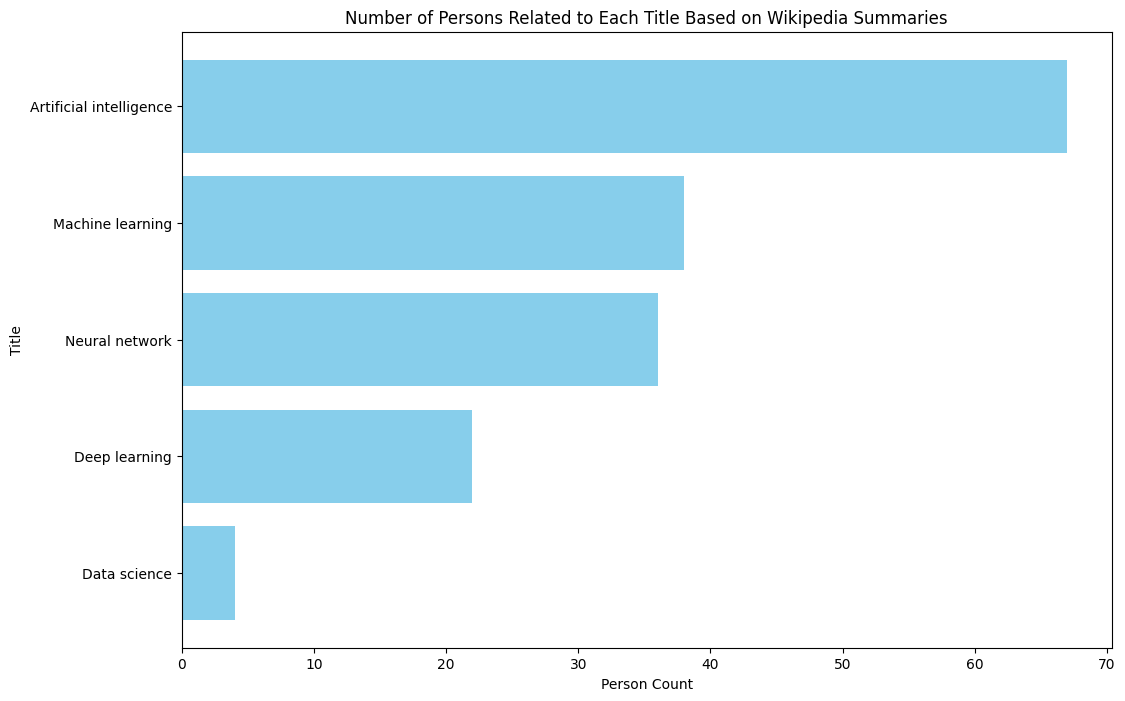

In [23]:
# Extract the unique titles
df_subset = df_links_only1
titles = df_subset['Title'].unique()
# Function to check if a title is mentioned in the summary
def is_title_mentioned(summary, title):
    return title.lower() in summary.lower()


# Identify related titles for each person
person_titles = {name: [title for title in titles if is_title_mentioned(summary, title)] for name, summary in person_summaries.items()}

# Convert the person_titles dictionary to a DataFrame
person_titles_df = pd.DataFrame([(person, title) for person, titles in person_titles.items() for title in titles], columns=['Person', 'Title'])

# Display the DataFrame of assigned titles
print("Assigned Titles for Each Person:")
print(person_titles_df)

# Plot the number of persons related to each title
title_counts = person_titles_df['Title'].value_counts().reset_index()
title_counts.columns = ['Title', 'PersonCount']

plt.figure(figsize=(12, 8))
plt.barh(title_counts['Title'], title_counts['PersonCount'], color='skyblue')
plt.xlabel('Person Count')
plt.ylabel('Title')
plt.title('Number of Persons Related to Each Title Based on Wikipedia Summaries')
plt.gca().invert_yaxis()
plt.show()

##  SECTION CLEANUP dataset to build graph: we wanted to extract the summary pages for each person and then find out all the keywords associated with the persons based on each category to see if we can measure the value of the person's contributation and if there was any differences between the centrality statistically measured.  Cleanup all the stop words and extract only most important keywords

In [24]:
import re

person_summaries = {name: fetch_wikipedia_summary(name) for name in person_names}

# Function to extract keywords from summaries
def extract_keywords(summary):
    # Remove punctuation and split into words
    words = re.findall(r'\b\w+\b', summary.lower())
    # Filter out common stop words (you can customize this list)
    stop_words = set(['the', 'and', 'is', 'in', 'to', 'of', 'a', 'for', 'on', 'with', 'as', 'by', 'an', 'at', 'from', 'that', 'this', 'it', 'be', 'are', 'or', 'which', 'was', 'but', 'not', 'have', 'has', 'had', 'were', 'they', 'their', 'its', 'can', 'will', 'would', 'should', 'could', 'may', 'might', 'must', 'shall', 'do', 'does', 'did', 'done', 'doing', 'been', 'being', 'if', 'then', 'than', 'so', 'such', 'these', 'those', 'there', 'here', 'when', 'where', 'why', 'how', 'what', 'who', 'whom', 'whose', 'i', 'you', 'he', 'she', 'we', 'they', 'them', 'us', 'our', 'your', 'my', 'mine', 'yours', 'his', 'hers', 'theirs', 'ours', 'me', 'him', 'her', 'itself', 'themselves', 'ourselves', 'yourselves', 'myself', 'yourself'])
    keywords = [word for word in words if word not in stop_words]
    return keywords


person_keywords = {name: extract_keywords(summary) for name, summary in person_summaries.items()}

# Create a DataFrame with person, title, and keywords
data = []
for person, keywords in person_keywords.items():
    title = df_persons[df_persons['Value'] == person]['Title'].values[0]
    for keyword in keywords:
        data.append({'Person': person, 'Title': title, 'Keyword': keyword})

keywords_df = pd.DataFrame(data)

print("DataFrame with Exploded Keywords:")
print(keywords_df)



DataFrame with Exploded Keywords:
                      Person                    Title      Keyword
0      Google Cloud Platform  Artificial intelligence       google
1      Google Cloud Platform  Artificial intelligence        cloud
2      Google Cloud Platform  Artificial intelligence     platform
3      Google Cloud Platform  Artificial intelligence          gcp
4      Google Cloud Platform  Artificial intelligence        suite
...                      ...                      ...          ...
21333            Donald Hebb           Neural network        terms
21334            Donald Hebb           Neural network  connections
21335            Donald Hebb           Neural network      between
21336            Donald Hebb           Neural network       neuron
21337            Donald Hebb           Neural network   assemblies

[21338 rows x 3 columns]


In [26]:
# Count the number of keywords extracted for each person
keyword_counts_by_person = keywords_df.groupby('Person').size().reset_index(name='KeywordCount')

# Display the keyword counts by person
print("Keyword Counts by Person:")
print(keyword_counts_by_person)

keyword_counts_by_person[keyword_counts_by_person['Person'] == 'Frank Rosenblatt']



Keyword Counts by Person:
                           Person  KeywordCount
0                   Adobe Firefly            61
1                       Aja Huang           112
2                  Alan Mackworth            29
3                     Alan Turing           308
4           Alan Turing Institute            26
..                            ...           ...
213                    Yann LeCun            98
214  Yaskawa Electric Corporation            72
215                  Yee Whye Teh            32
216                 Yoshua Bengio            86
217                   Zhuang Zhou            54

[218 rows x 2 columns]


,Person,KeywordCount
71,Frank Rosenblatt,24


In [27]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already available
#nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Define a function to clean keywords
def clean_keyword(keyword):
    keyword = keyword.lower().strip()  # Convert to lowercase & remove spaces
    if keyword in stop_words or len(keyword) <= 3:  # Remove stop words & short words
        return None
    return keyword

# Apply cleaning function to the 'Keyword' column
keywords_df["Keyword"] = keywords_df["Keyword"].apply(clean_keyword)

# Drop rows where 'Keyword' was removed
df = keywords_df.dropna(subset=["Keyword"])

print(df.head())  # Check cleaned DataFrame

                  Person                    Title   Keyword
0  Google Cloud Platform  Artificial intelligence    google
1  Google Cloud Platform  Artificial intelligence     cloud
2  Google Cloud Platform  Artificial intelligence  platform
4  Google Cloud Platform  Artificial intelligence     suite
5  Google Cloud Platform  Artificial intelligence     cloud


### Statistical Analysis Section
Build a graph with 
NODE: PERSON or a keyword
EDGE: Association between a PERSON and KEYWORD
Add Category to persons in the nodes

Calculate Degree Centrality and Eigenvector centrality and then report the values.
We understand after running ANOVA test that there is not much significance based on the values calculated.
We tried to identify those people in the field based on their connections to different topic keywords extracted from their summary wiki pages. The titles with higher average centrality are those that have a lot more key people in those respective fields. Eigenvector centrality calculates those individuals that are important within the different fields selected. 

### RESULTS 

The statistical tests and the boxplot of the data extracted prove that the topic keywords extracted and the centrality calculated are all in the similar range, therefore the it is expected that p value is not as significant across these different areas based on the extracted data and the topic keywords within each individual's wiki summary pages that allowed their contribution to be quantified to that specific area of expertise. 


In [28]:
import networkx as nx
import pandas as pd

G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row["Person"], row["Keyword"])

# Compute Centrality Measures
degree_centrality = nx.degree_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)  # Iterations for convergence

# Store Centrality in DataFrame
centrality_df = pd.DataFrame({
    "Node": list(G.nodes),
    "Degree Centrality": [degree_centrality[node] for node in G.nodes],
    "Eigenvector Centrality": [eigenvector_centrality[node] for node in G.nodes]
})

# Add Title (Category) to Persons
person_title_mapping = df.drop_duplicates(subset=["Person", "Title"]).set_index("Person")["Title"]
centrality_df["Category"] = centrality_df["Node"].map(person_title_mapping)

# Compare Centrality Measures Across Titles (Categories)
comparison = centrality_df.dropna().groupby("Category")[["Degree Centrality", "Eigenvector Centrality"]].mean()
print(comparison)


                         Degree Centrality  Eigenvector Centrality
Category                                                          
Artificial intelligence           0.014868                0.043377
Data science                      0.007395                0.031325
Deep learning                     0.009207                0.037616
Machine learning                  0.010377                0.034066
Neural network                    0.013580                0.047265


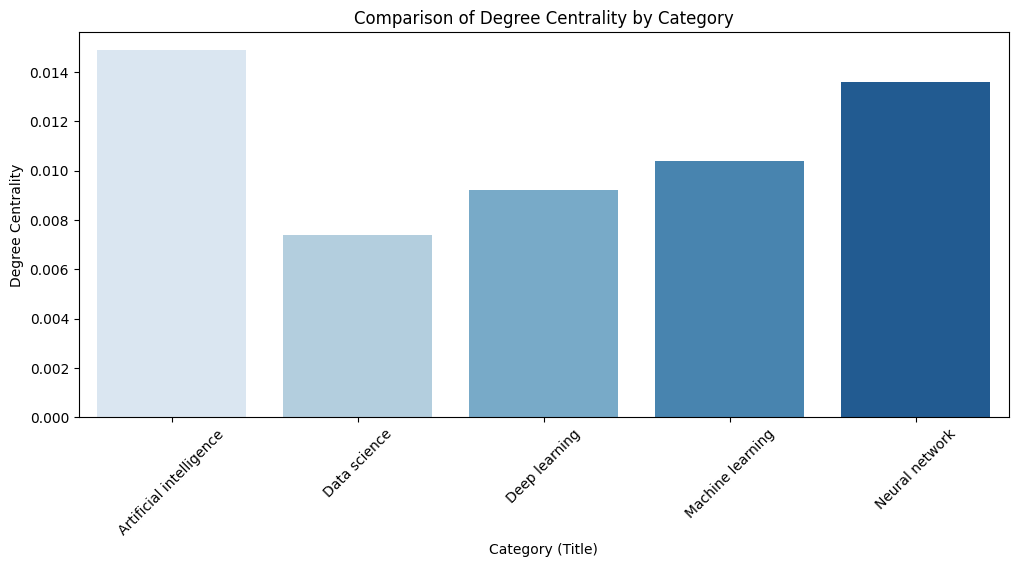

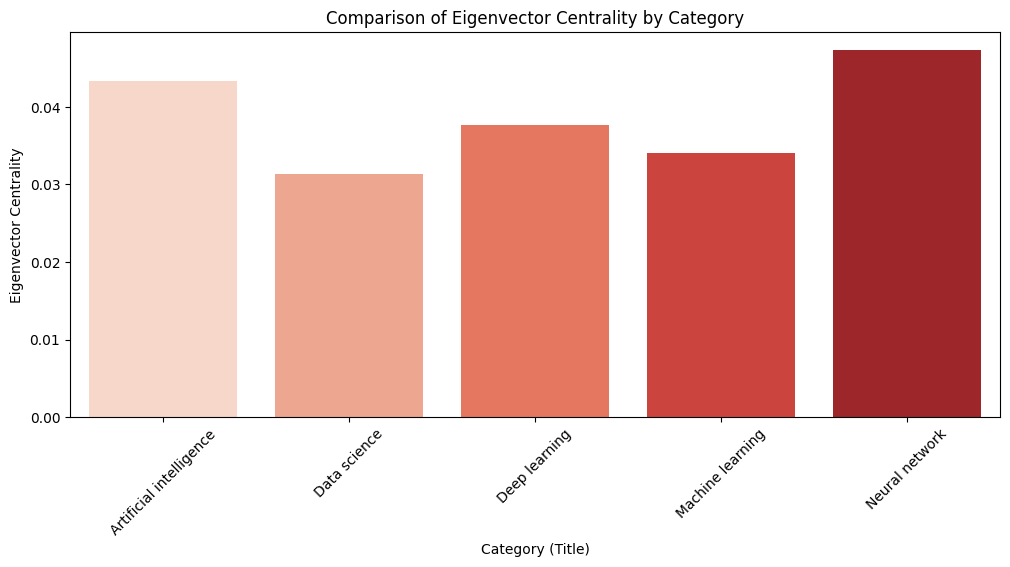

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Degree Centrality
plt.figure(figsize=(12, 5))
sns.barplot(x=comparison.index, y=comparison["Degree Centrality"], palette="Blues")
plt.xlabel("Category (Title)")
plt.ylabel("Degree Centrality")
plt.title("Comparison of Degree Centrality by Category")
plt.xticks(rotation=45)
plt.show()

# Plot Eigenvector Centrality
plt.figure(figsize=(12, 5))
sns.barplot(x=comparison.index, y=comparison["Eigenvector Centrality"], palette="Reds")
plt.xlabel("Category (Title)")
plt.ylabel("Eigenvector Centrality")
plt.title("Comparison of Eigenvector Centrality by Category")
plt.xticks(rotation=45)
plt.show()


In [30]:
from scipy.stats import f_oneway

# Extract centrality values grouped by category
degree_groups = [centrality_df.loc[centrality_df["Category"] == cat, "Degree Centrality"].dropna() 
                 for cat in centrality_df["Category"].dropna().unique()]
eigenvector_groups = [centrality_df.loc[centrality_df["Category"] == cat, "Eigenvector Centrality"].dropna() 
                      for cat in centrality_df["Category"].dropna().unique()]

# ANOVA test for Degree Centrality
anova_degree = f_oneway(*degree_groups)

# ANOVA test for Eigenvector Centrality
anova_eigenvector = f_oneway(*eigenvector_groups)

print("ANOVA Results:")
print(f"Degree Centrality p-value: {anova_degree.pvalue:.5f}")
print(f"Eigenvector Centrality p-value: {anova_eigenvector.pvalue:.5f}")

if anova_degree.pvalue < 0.05:
    print("Degree centrality significantly varies across categories.")
else:
    print("No significant difference in Degree Centrality across categories.")

if anova_eigenvector.pvalue < 0.05:
    print("Eigenvector centrality significantly varies across categories.")
else:
    print("No significant difference in Eigenvector Centrality across categories.")


ANOVA Results:
Degree Centrality p-value: 0.00324
Eigenvector Centrality p-value: 0.23260
Degree centrality significantly varies across categories.
No significant difference in Eigenvector Centrality across categories.


In [31]:

top_degree = (
    centrality_df.dropna()
    .sort_values(by="Degree Centrality", ascending=False)
    .groupby("Category")
 
)

top_degree.head(20)



,Node,Degree Centrality,Eigenvector Centrality,Category
5139,Template talk:Machine learning,0.085099,0.197835,Machine learning
1655,Wikipedia:Citation needed,0.059207,0.088940,Artificial intelligence
3990,Paul Feyerabend,0.042730,0.095550,Artificial intelligence
3855,Gottfried Wilhelm Leibniz,0.041282,0.110811,Artificial intelligence
84,Alan Turing,0.040014,0.107649,Artificial intelligence
...,...,...,...,...
4215,Daniela Witten,0.003802,0.022493,Data science
4164,Joanna Bryson,0.003259,0.017335,Data science
4176,Jeff Hammerbacher,0.003259,0.011103,Data science
4224,Arvind Narayanan,0.003078,0.021989,Data science


In [34]:
# Step 2: Sort nodes by Eigenvector Centrality within each Category
top_eigenvector = (
    centrality_df.dropna()
    .sort_values(by="Eigenvector Centrality", ascending=False)
    .groupby("Category")
   
)

top_eigenvector.head(20)

,Node,Degree Centrality,Eigenvector Centrality,Category
5139,Template talk:Machine learning,0.085099,0.197835,Machine learning
4344,Geoff Hinton,0.028608,0.135403,Deep learning
4950,Geoffrey Hinton,0.028608,0.135403,Deep learning
3366,Claude Shannon,0.037842,0.125458,Artificial intelligence
620,Symbolic AI,0.037661,0.117398,Artificial intelligence
...,...,...,...,...
4197,Jim Gray (computer scientist),0.004527,0.021133,Data science
5101,Oracle Cloud,0.010502,0.020531,Machine learning
4164,Joanna Bryson,0.003259,0.017335,Data science
4176,Jeff Hammerbacher,0.003259,0.011103,Data science


In [36]:
from scipy.stats import ttest_ind

ai_degree = centrality_df.loc[centrality_df["Category"] == "Artificial intelligence", "Degree Centrality"].dropna()
ds_degree = centrality_df.loc[centrality_df["Category"] == "Data science", "Degree Centrality"].dropna()

t_stat_degree, p_value_degree = ttest_ind(ai_degree, ds_degree, equal_var=False)  # Welch’s t-test

ai_eigenvector = centrality_df.loc[centrality_df["Category"] == "Artificial intelligence", "Eigenvector Centrality"].dropna()
ds_eigenvector = centrality_df.loc[centrality_df["Category"] == "Data science", "Eigenvector Centrality"].dropna()


t_stat_eigenvector, p_value_eigenvector = ttest_ind(ai_eigenvector, ds_eigenvector, equal_var=False)  # Welch’s t-test

print("T-Test Results:")
print(f"Degree Centrality t-statistic: {t_stat_degree:.4f}, p-value: {p_value_degree:.4f}")
print(f"Eigenvector Centrality t-statistic: {t_stat_eigenvector:.4f}, p-value: {p_value_eigenvector:.4f}")

# Interpretation
if p_value_degree < 0.05:
    print("Degree centrality significantly differs between AI and DS.")
else:
    print("No significant difference in Degree Centrality between AI and DS.")

if p_value_eigenvector < 0.05:
    print("Eigenvector centrality significantly differs between AI and DS.")
else:
    print("No significant difference in Eigenvector Centrality between AI and DS.")


T-Test Results:
Degree Centrality t-statistic: 4.7294, p-value: 0.0000
Eigenvector Centrality t-statistic: 2.6288, p-value: 0.0120
Degree centrality significantly differs between AI and DS.
Eigenvector centrality significantly differs between AI and DS.


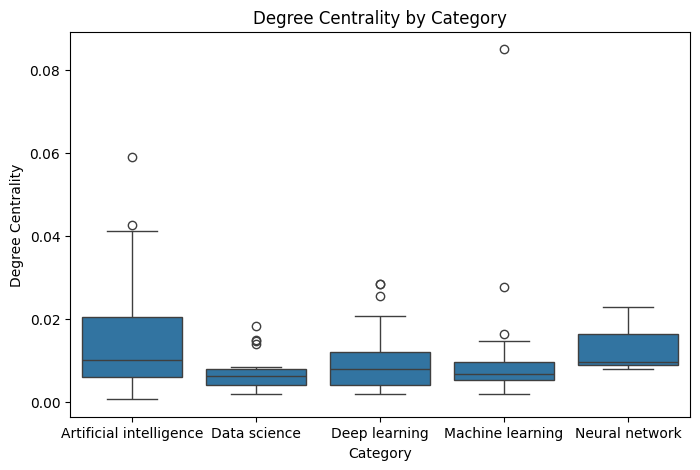

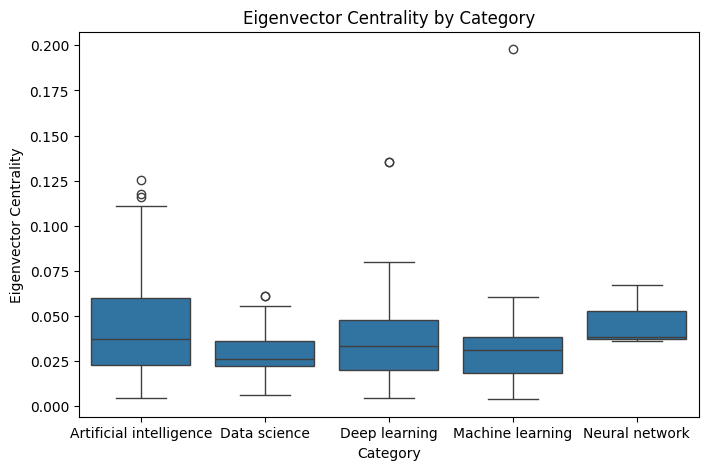

In [37]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Category", y="Degree Centrality", data=centrality_df)
plt.title("Degree Centrality by Category")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x="Category", y="Eigenvector Centrality", data=centrality_df)
plt.title("Eigenvector Centrality by Category")
plt.show()


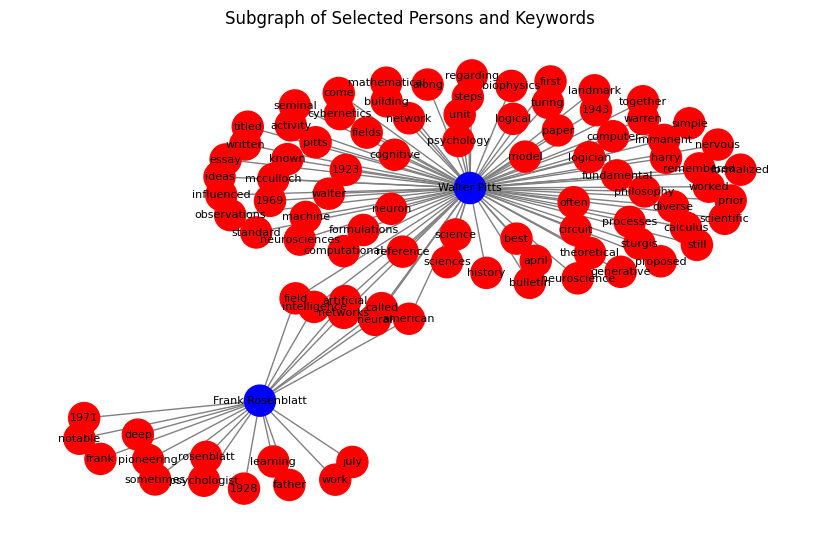

In [39]:


# Select a subset of persons (you can modify this list)
selected_persons = ["Frank Rosenblatt", "Walter Pitts"]  # Add more names if needed

# Extract their neighbors (keywords)
selected_keywords = set()
for person in selected_persons:
    if person in G:
        selected_keywords.update(G.neighbors(person))

# Create a subgraph with selected persons and their keywords
subgraph_nodes = set(selected_persons) | selected_keywords
G_sub = G.subgraph(subgraph_nodes)

# Assign colors: Blue for persons, Red for keywords
node_colors = ["blue" if node in selected_persons else "red" for node in G_sub.nodes]

# Draw the subgraph
plt.figure(figsize=(8, 5))
pos = nx.spring_layout(G_sub, seed=42)  # Layout for positioning
nx.draw(G_sub, pos, with_labels=True, node_size=500, node_color=node_colors, font_size=8, edge_color="gray")

# Show the plot
plt.title("Subgraph of Selected Persons and Keywords")
plt.show()


In [188]:
# Bipartite Graph G consists of two distinct node sets:
# Persons (e.g., "Frank Rosenblatt", "Walter Pitts")
# Keywords (e.g., "Neural Networks", "Perceptron")
# Edges exist only between a person and a keyword
num_nodes_full = G.number_of_nodes()
num_edges_full = G.number_of_edges()
print(f"Full Graph: {num_nodes_full} nodes, {num_edges_full} edges")



Full Graph: 2272 nodes, 4019 edges
